##Preparación de los Datos


###Carga de datos

In [46]:
import pandas as pd

url_datos_limpios = 'https://raw.githubusercontent.com/LexMtz/challegue-telecom-x-parte-2/refs/heads/main/datos_tratados.csv'


df = pd.read_csv(url_datos_limpios)

df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


###Eliminacion de Columnas irrelevantes

In [47]:
df.drop(columns=['CustomerID'], inplace=True)

display(df.head())

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,No,Female,0,1,1,9,1,0,One year,1,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,No,Male,0,0,0,9,1,1,Month-to-month,0,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,Yes,Male,0,0,0,4,1,0,Month-to-month,1,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,Yes,Male,1,1,0,13,1,0,Month-to-month,1,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,Yes,Female,1,1,0,3,1,0,Month-to-month,1,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


###Encoding

In [48]:
df.info()
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
df_encoded.info()
df_encoded.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   Gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   Tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   Contract          7267 non-null   object 
 9   PaperlessBilling  7267 non-null   int64  
 10  PaymentMethod     7267 non-null   object 
 11  InternetService   7267 non-null   object 
 12  OnlineSecurity    7267 non-null   object 
 13  OnlineBackup      7267 non-null   object 
 14  DeviceProtection  7267 non-null   object 
 15  TechSupport       7267 non-null   object 
 16  StreamingTV       7267 non-null   object 


(7267, 30)

###Verificación de la Proporción de Cancelación (Churn)

In [49]:
conteo_clases = df_encoded['Churn_Yes'].value_counts()
print("Conteo de Clases:")
print(conteo_clases)

proporcion_clases = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100
print("\nProporción de Clases (%):")
print(proporcion_clases)

Conteo de Clases:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64

Proporción de Clases (%):
Churn_Yes
False    74.280996
True     25.719004
Name: proportion, dtype: float64


###Balanceo de Clases

In [50]:
!pip install imbalanced-learn -q


from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

imputer = SimpleImputer(strategy='mean')


X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Verificación de valores nulos después de la imputación:")
print(X_imputed.isnull().sum().sum())
print("-" * 30)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

print("Distribución de clases después de aplicar SMOTE:")
print(y_resampled.value_counts())
print("-" * 30)

print(f"Dimensiones de X antes de SMOTE: {X_imputed.shape}")
print(f"Dimensiones de X después de SMOTE: {X_resampled.shape}")

Verificación de valores nulos después de la imputación:
0
------------------------------
Distribución de clases después de aplicar SMOTE:
Churn_Yes
False    5398
True     5398
Name: count, dtype: int64
------------------------------
Dimensiones de X antes de SMOTE: (7267, 29)
Dimensiones de X después de SMOTE: (10796, 29)


###Normalización o Estandarización

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Datos de entrenamiento estandarizados (primeras 5 filas):")
display(X_train_scaled.head())

Datos de entrenamiento estandarizados (primeras 5 filas):


,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,PaperlessBilling,ChargesTotal,ChargesMonthly,Gender_Male,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-0.515939,-0.921795,-0.620131,-0.777988,0.325786,-0.901737,0.771156,-0.848136,-1.706729,1.044572,...,2.238518,-0.718419,2.238518,-0.718924,2.238518,-0.601193,2.238518,-0.844183,2.238518,-0.847329
1,-0.515939,-0.921795,1.737843,-1.069106,0.325786,-0.901737,0.771156,-0.916741,-1.684055,-1.063605,...,2.238518,-0.718419,2.238518,-0.718924,2.238518,-0.601193,2.238518,-0.844183,2.238518,-0.847329
2,-0.515939,-0.136902,-0.620131,-1.027518,0.325786,-0.123708,-0.588160,-0.819124,0.500402,-0.277917,...,-0.450180,0.677006,-0.450180,-0.718924,-0.450180,0.292089,-0.450180,0.478589,-0.450180,-0.847329
3,2.053253,1.060094,-0.481124,-1.110694,0.325786,1.185891,0.771156,-0.887014,1.146304,-0.939324,...,-0.450180,-0.718419,-0.450180,1.510660,-0.450180,-0.601193,-0.450180,1.264445,-0.450180,1.254640
4,-0.515939,-0.921795,1.737843,-1.069106,0.325786,-0.901737,-1.395727,-0.913512,-1.656148,1.044572,...,2.238518,-0.718419,2.238518,-0.718924,2.238518,-0.601193,2.238518,-0.844183,2.238518,-0.847329


##Correlación y Selección de Variables

###Análisis de Correlación

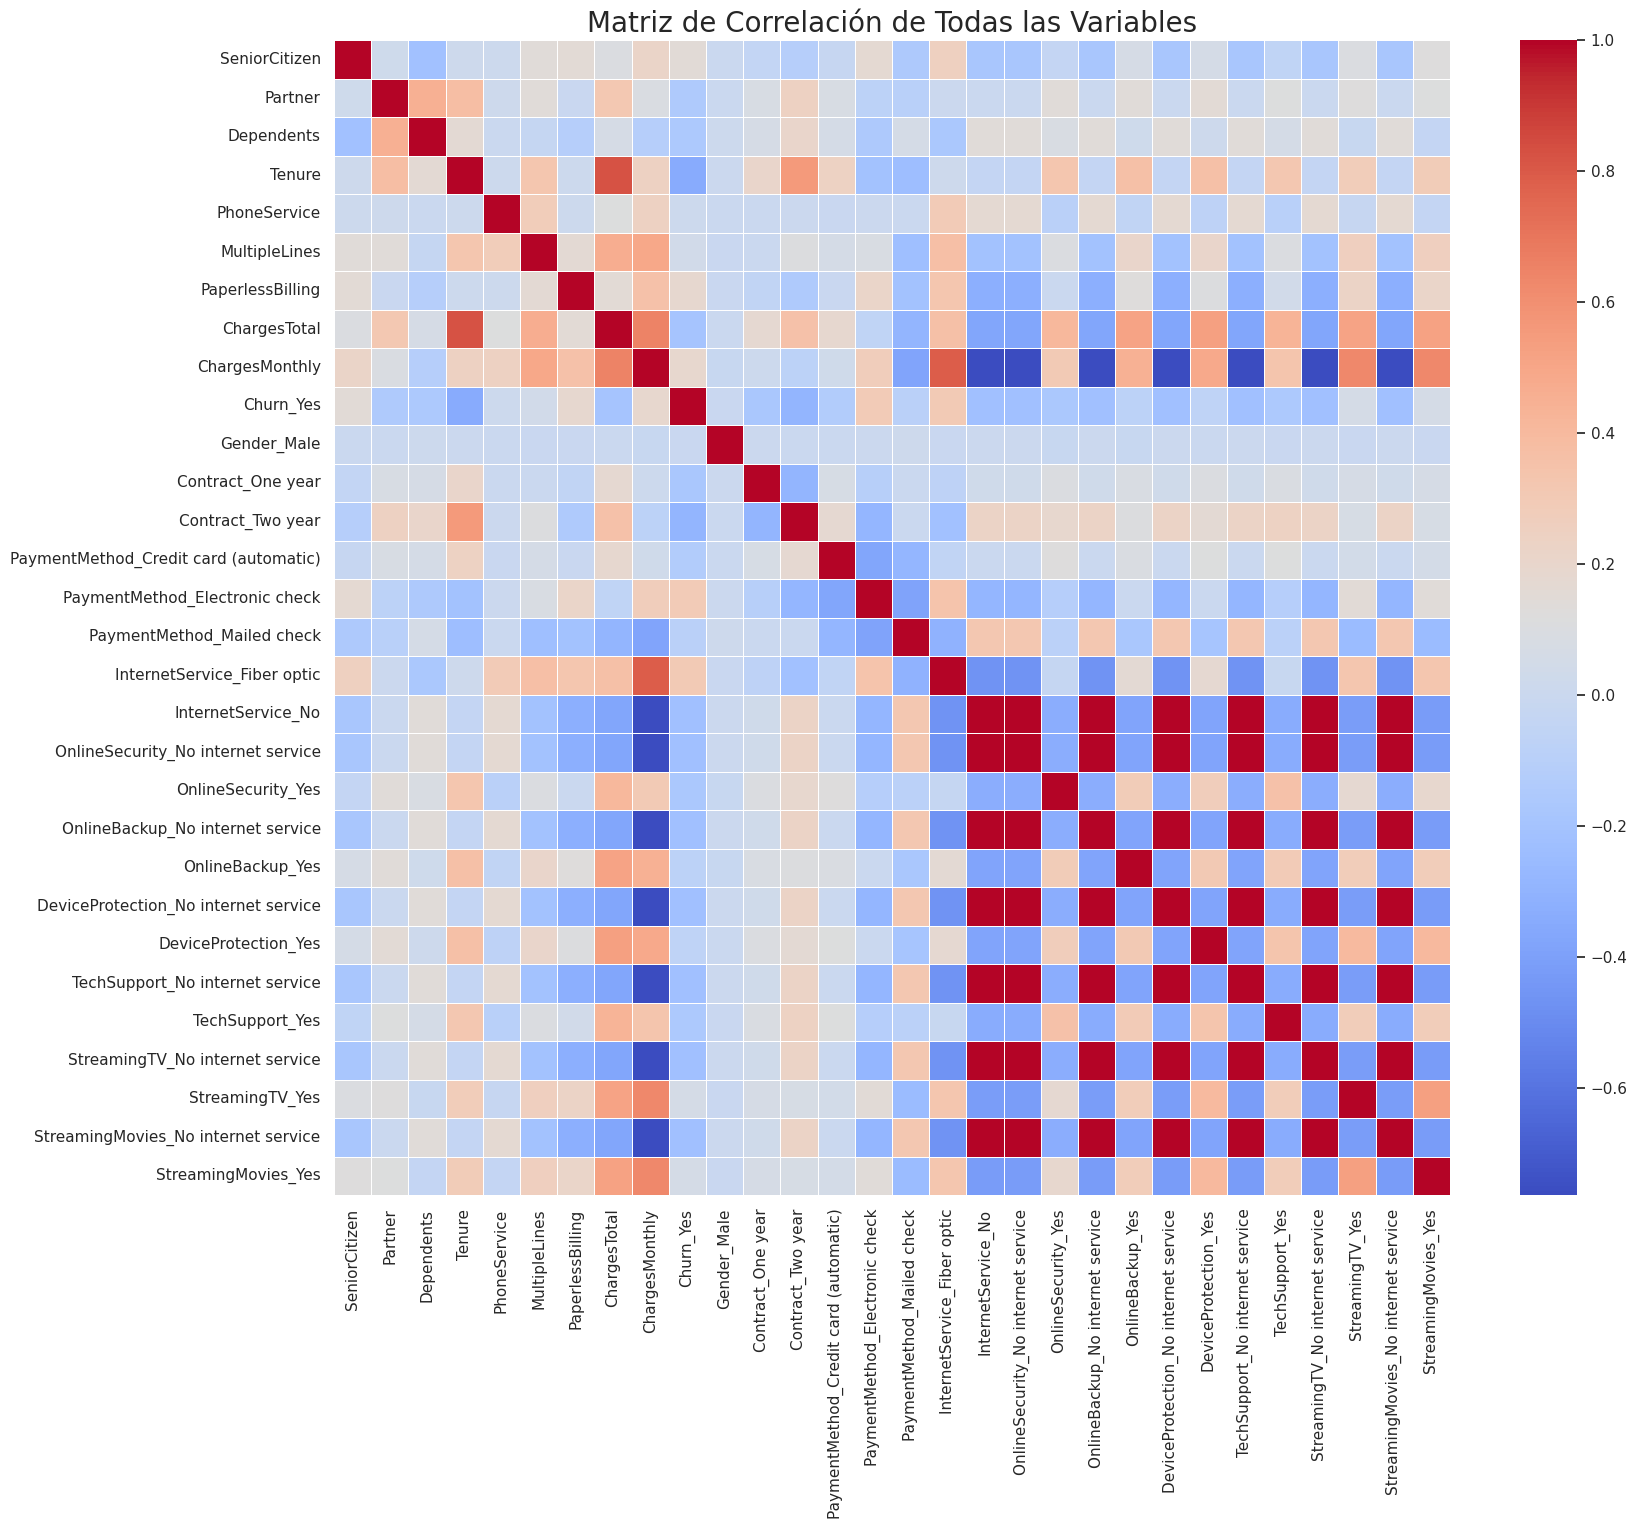

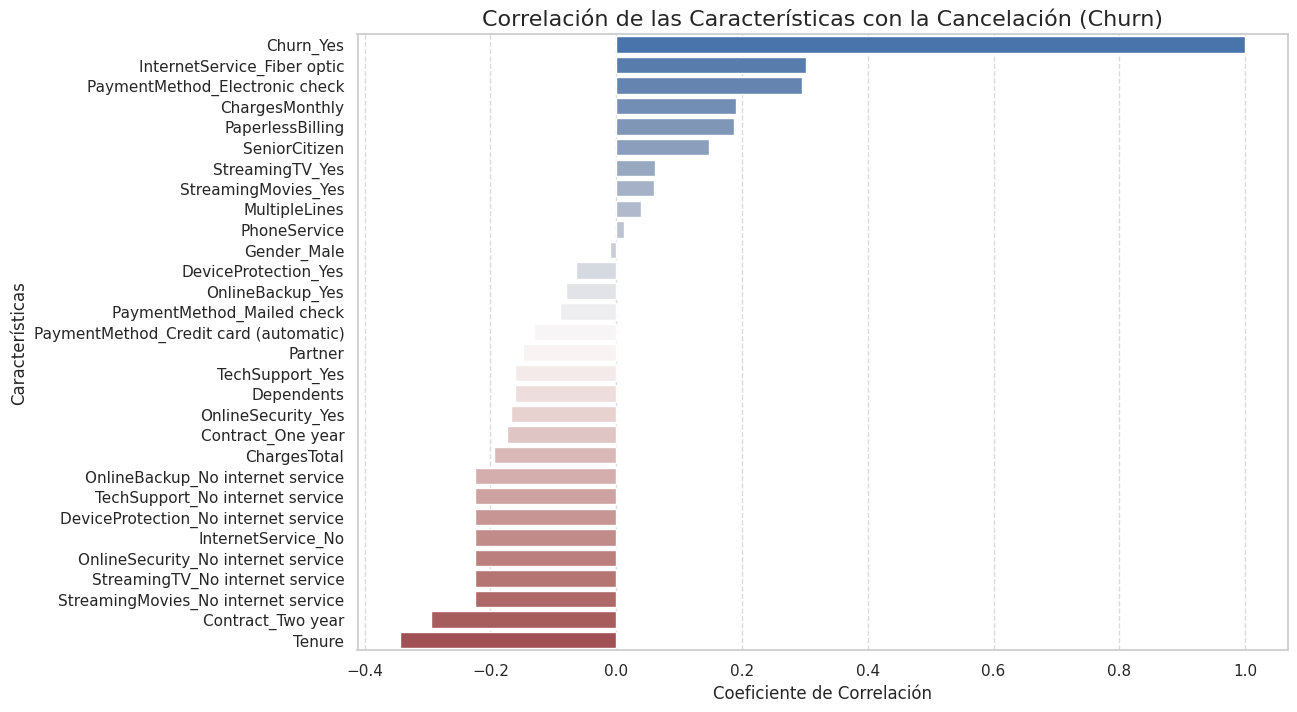


Variables con Mayor Correlación Positiva (impulsan la cancelación):
Churn_Yes                         1.000000
InternetService_Fiber optic       0.300949
PaymentMethod_Electronic check    0.294626
ChargesMonthly                    0.189866
PaperlessBilling                  0.186666
Name: Churn_Yes, dtype: float64

Variables con Mayor Correlación Negativa (previenen la cancelación):
OnlineSecurity_No internet service    -0.224051
StreamingTV_No internet service       -0.224051
StreamingMovies_No internet service   -0.224051
Contract_Two year                     -0.295138
Tenure                                -0.344079
Name: Churn_Yes, dtype: float64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_encoded.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables', fontsize=20)
plt.show()

corr_churn = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=corr_churn.values,
    y=corr_churn.index,
    hue=corr_churn.index,
    palette='vlag',
    legend=False
)
plt.title('Correlación de las Características con la Cancelación (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\nVariables con Mayor Correlación Positiva (impulsan la cancelación):")
print(corr_churn.head(5))

print("\nVariables con Mayor Correlación Negativa (previenen la cancelación):")
print(corr_churn.tail(5))

###Análisis Dirigido

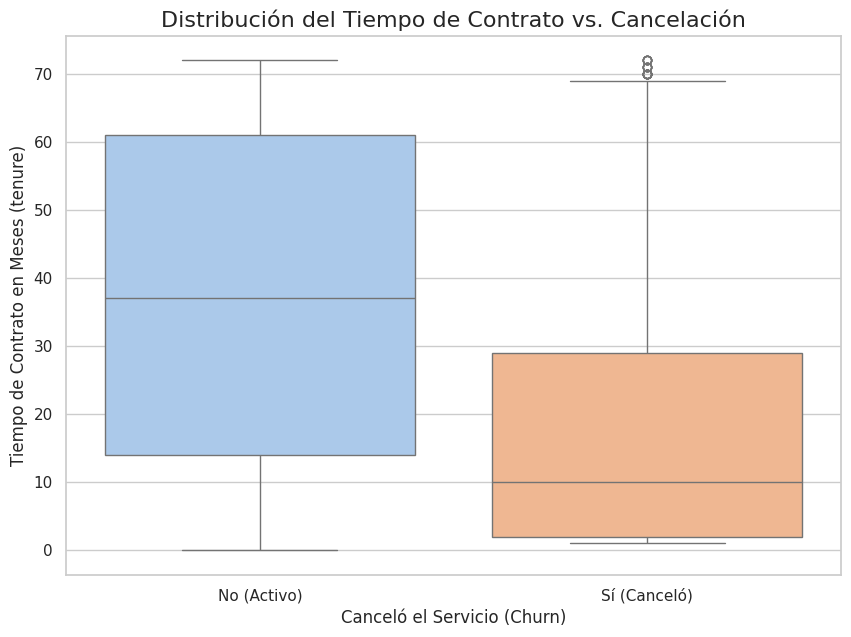

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn_Yes',
    y='Tenure',
    data=df_encoded,
    palette='pastel',
    hue='Churn_Yes',
    legend=False
)


plt.title('Distribución del Tiempo de Contrato vs. Cancelación', fontsize=16)
plt.xlabel('Canceló el Servicio (Churn)', fontsize=12)
plt.ylabel('Tiempo de Contrato en Meses (tenure)', fontsize=12)
plt.xticks([0, 1], ['No (Activo)', 'Sí (Canceló)'])
plt.show()

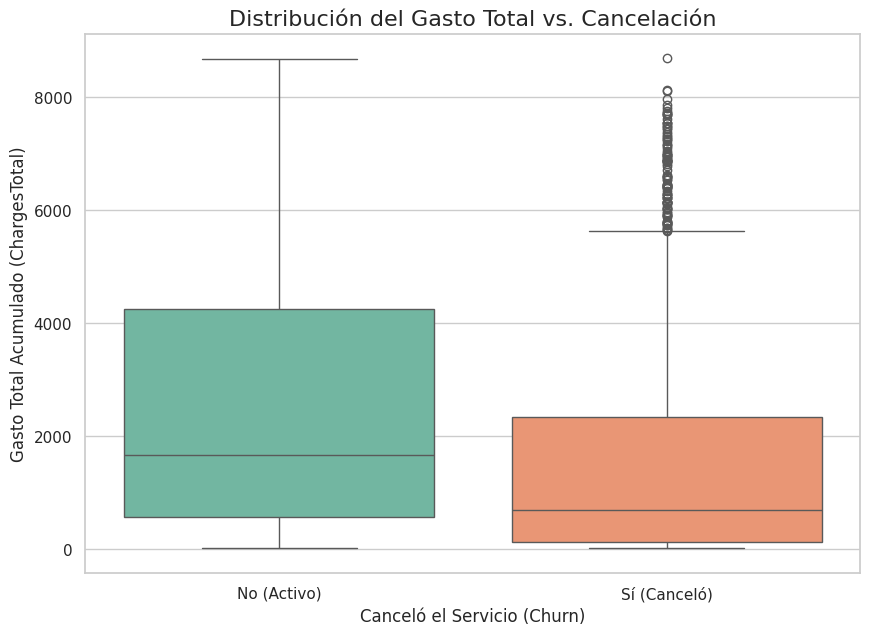

In [61]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn_Yes', y='ChargesTotal', data=df_encoded, palette='Set2', hue='Churn_Yes', legend=False)

plt.title('Distribución del Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Canceló el Servicio (Churn)', fontsize=12)
plt.ylabel('Gasto Total Acumulado (ChargesTotal)', fontsize=12)
plt.xticks([0, 1], ['No (Activo)', 'Sí (Canceló)'])
plt.show()

##🤖 Modelado Predictivo

###Separación de Datos

In [55]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("-" * 40)
print("Dimensiones del objetivo de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del objetivo de prueba (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train): (8636, 29)
Dimensiones del conjunto de prueba (X_test): (2160, 29)
----------------------------------------
Dimensiones del objetivo de entrenamiento (y_train): (8636,)
Dimensiones del objetivo de prueba (y_test): (2160,)


###Creación de Modelos

In [56]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_scaled, y_train)

print("✅ Modelo de Regresión Logística entrenado exitosamente.")

✅ Modelo de Regresión Logística entrenado exitosamente.


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

print("✅ Modelo de Random Forest entrenado exitosamente.")

✅ Modelo de Random Forest entrenado exitosamente.


##📋 Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

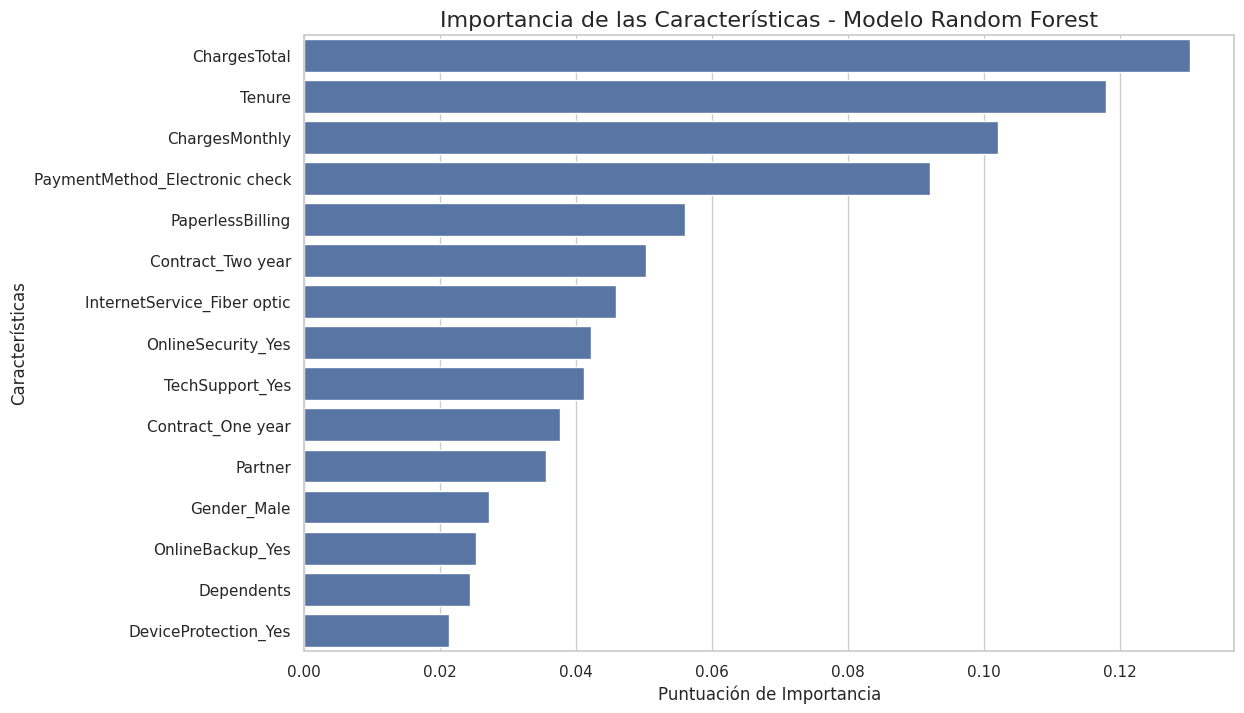

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_clf.feature_importances_
feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=forest_importances.head(15), y=forest_importances.head(15).index)
plt.title('Importancia de las Características - Modelo Random Forest', fontsize=16)
plt.xlabel('Puntuación de Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

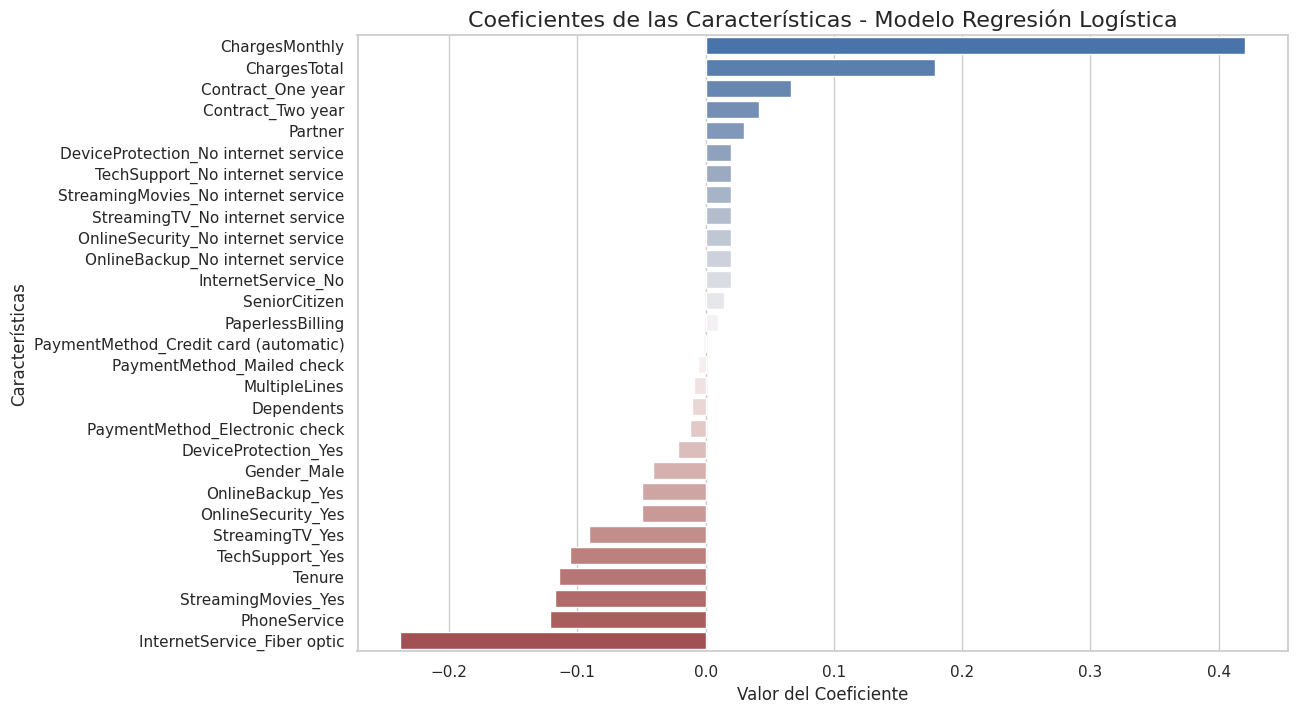

In [59]:
coefficients = log_reg.coef_[0]

logistic_importances = pd.Series(coefficients, index=X_train_scaled.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=logistic_importances, y=logistic_importances.index, palette="vlag", hue=logistic_importances.index, legend=False)
plt.title('Coeficientes de las Características - Modelo Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

###Conclusión

El análisis de ambos modelos reveló una notable consistencia en la identificación de las variables más influyentes. A continuación, se detallan los factores en orden de importancia.

**a) Tipo de Contrato y Antigüedad:**

**Contrato Mes a Mes (Contract_Month-to-month):** Es el factor más determinante para la cancelación. Ambos modelos le asignaron la máxima importancia. La flexibilidad de este contrato permite a los clientes insatisfechos o sensibles al precio abandonar el servicio sin penalización, convirtiéndolos en el segmento de mayor riesgo.

**Antigüedad (tenure):** Es el factor más importante para la retención. Cuanto más tiempo un cliente permanece en la compañía, menor es su probabilidad de irse. El análisis de los coeficientes de la Regresión Logística mostró que la antigüedad tiene el impacto negativo (protector) más fuerte contra la cancelación.

**b) Servicios y Costos:**

Servicio de Internet - Fibra Óptica (InternetService_Fiber optic): Este factor mostró una correlación positiva con la cancelación. Aunque la fibra óptica es un servicio premium, esto podría indicar problemas de estabilidad, un precio percibido como demasiado alto en comparación con el beneficio, o expectativas de rendimiento no cumplidas que llevan a la frustración y posterior cancelación.

**Cargos Mensuales (MonthlyCharges):** Un costo mensual elevado también se asocia con una mayor probabilidad de cancelación. Los clientes que pagan más son más propensos a reevaluar constantemente si el servicio justifica el costo.

**c) Servicios de Soporte:**

**Sin Soporte Técnico (TechSupport_No) y Sin Seguridad Online (OnlineSecurity_No):** La ausencia de estos servicios de valor añadido se correlaciona con una mayor tasa de cancelación. Esto sugiere que los clientes que no se sienten técnicamente respaldados o seguros son más vulnerables a abandonar el servicio ante el primer problema.

####**Estrategias de Retención Recomendadas**

Basado en los factores identificados, se proponen las siguientes estrategias proactivas para reducir la tasa de cancelación:

**Transformar Contratos Mensuales:**

Crear una campaña dirigida a clientes con contratos mes a mes, ofreciendo un descuento significativo (ej. 15-20%) o un servicio adicional gratuito (ej. un upgrade de velocidad) si migran a un contrato de uno o dos años.

Ataca directamente al factor de riesgo #1. Un contrato a largo plazo asegura ingresos y reduce drásticamente la probabilidad de cancelación.

*Fortalecer la Lealtad Temprana (Programa "Primer Año Dorado"):*

Implementar un programa de onboarding y seguimiento para clientes durante sus primeros 12 meses. Esto podría incluir una llamada de bienvenida, una revisión de la primera factura, y ofertas exclusivas al cumplir 3, 6 y 12 meses.

Combate la alta tasa de cancelación en clientes con baja antigüedad (tenure). Fortalecer la relación en esta etapa crítica es clave para la retención a largo plazo.

**Revalorizar el Servicio de Fibra Óptica:**

Realizar un análisis de la red para asegurar la estabilidad del servicio de fibra. Además, lanzar una campaña de comunicación que destaque sus beneficios y ofrezca Soporte Técnico prioritario a estos clientes para mejorar su percepción de valor y respaldo.

Aborda la alta cancelación en este segmento premium. Si el problema no es técnico, podría ser necesario ajustar el precio o mejorar el paquete de valor.

**Promocionar Paquetes de "Tranquilidad":**

Ofrecer paquetes que incluyan Soporte Técnico y Seguridad Online a un precio reducido durante los primeros 6 meses de servicio.

Reduce la vulnerabilidad de los clientes que no tienen estos servicios de soporte, creando una "red de seguridad" que mejora la experiencia y reduce la frustración.

####**Consideraciones finales**

La cancelación de clientes no es un evento aleatorio, sino el resultado de factores predecibles y manejables. Al enfocarse en la estructura del contrato, la antigüedad del cliente y la percepción de valor del servicio, la compañía puede pasar de una estrategia reactiva a una proactiva, implementando acciones concretas que no solo retendrán a los clientes actuales, sino que también mejorarán la satisfacción general del servicio.